In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
features = list()
with open ('features.txt') as f:
    features = [line.strip() for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [3]:
activity_map = {
    1: 'WALKING', 
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LYING'
}

# Obtain the train data

In [4]:
X_train = pd.read_csv('train/X_train.txt', delim_whitespace=True, header=None, names=features)
X_train['Subject'] = pd.read_csv('train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map(activity_map)

train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels

train['Subject'] = train['Subject'].astype('category')
train['Activity'] = train['Activity'].astype('category')
train['ActivityName'] = train['ActivityName'].astype('category')

print(train.shape)
train.sample()


(7352, 564)


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",Subject,Activity,ActivityName
517,0.215497,-0.012975,-0.086176,-0.238264,0.10142,-0.304838,-0.276293,0.096935,-0.287176,-0.199904,...,0.751728,-0.859686,-0.935166,0.397413,-0.591155,0.357147,0.129779,3,2,WALKING_UPSTAIRS


In [5]:
X_test = pd.read_csv('test/X_test.txt', delim_whitespace=True, header=None, names=features)
X_test['Subject'] = pd.read_csv('test/subject_test.txt', header=None, squeeze=True)

y_test = pd.read_csv('test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map(activity_map)

test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

test['Subject'] = test['Subject'].astype('category')
test['Activity'] = test['Activity'].astype('category')
test['ActivityName'] = test['ActivityName'].astype('category')

print(test.shape)
test.sample()


(2947, 564)


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",Subject,Activity,ActivityName
1600,0.274901,-0.018314,-0.104109,-0.968966,-0.941171,-0.940561,-0.968338,-0.932891,-0.932083,-0.9183,...,-0.302875,0.315854,-0.180249,-0.079743,0.329061,-0.242031,-0.719726,13,6,LYING


In [6]:
X_train_dropped = train.drop(['Subject', 'Activity', 'ActivityName'], axis=1)
X_test_dropped = test.drop(['Subject', 'Activity', 'ActivityName'], axis=1)

# Data Cleaning

In [7]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [8]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

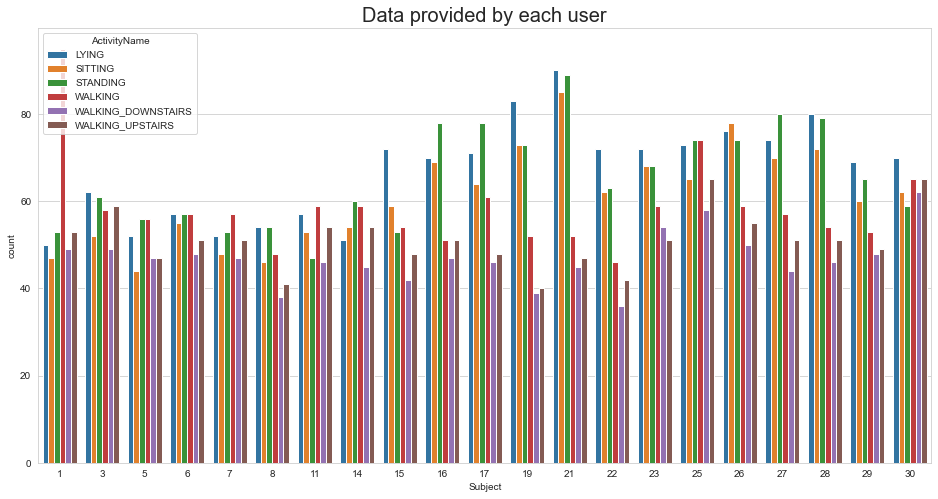

In [10]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='Subject',hue='ActivityName', data = train)
plt.show()

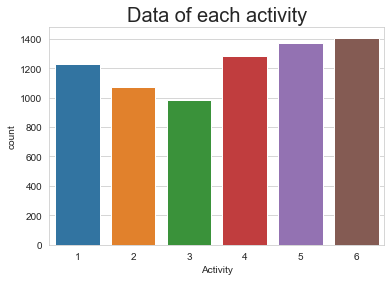

In [11]:
plt.title('Data of each activity', fontsize=20)
sns.countplot(train.Activity)
plt.show()

# Exploration

##### Domain Knowledge: 
 - Stationary activities and moving activites are significantly different in acceleration. 
 - Lying differs from others in orientation
 - Walking downstairs and walking upstairs will have y acceleration of opposite direction. 

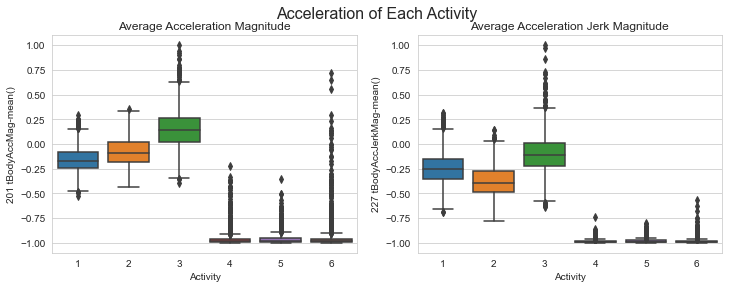

In [12]:
# Moving activities (1,2,3) should have higher tBodyAccMag/tBodyAccJerkMag than stationary activities (4,5,6)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Acceleration of Each Activity', fontsize=16)
sns.boxplot(ax=axes[0], x="Activity", y="201 tBodyAccMag-mean()", data=train)
axes[0].set_title('Average Acceleration Magnitude')
sns.boxplot(ax=axes[1], x="Activity", y="227 tBodyAccJerkMag-mean()", data=train)
axes[1].set_title('Average Acceleration Jerk Magnitude')
fig.show()

Acceleration jerk could effectively distinguish the moving and stationary activities. 
Also, we observed that the average acceleration jerk is higher in activity 3 (walking downstairs) than activity 2 (walking upstairs). This is because people generally walk downstair faster than climbing upstair. 

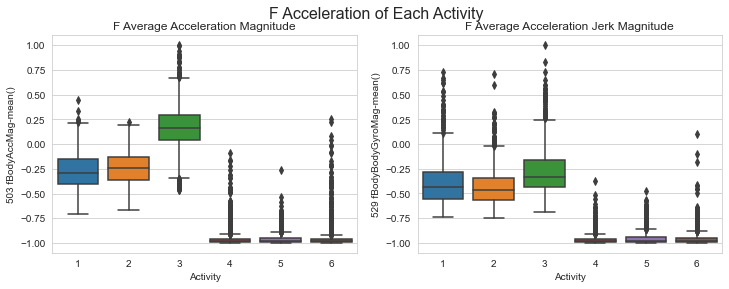

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('F Acceleration of Each Activity', fontsize=16)
sns.boxplot(ax=axes[0], x="Activity", y="503 fBodyAccMag-mean()", data=train)   # add showFliers=False to not show those outliers
axes[0].set_title('F Average Acceleration Magnitude')
sns.boxplot(ax=axes[1], x="Activity", y="529 fBodyBodyGyroMag-mean()", data=train)
axes[1].set_title('F Average Acceleration Jerk Magnitude')
fig.show()

After Fourier Transform the data is less effective in distinguishing the moving and stationary activities. However, there is a bigger difference between 2 and 3 (walking upstairs and walking downstairs), so this transform may still be useful.  

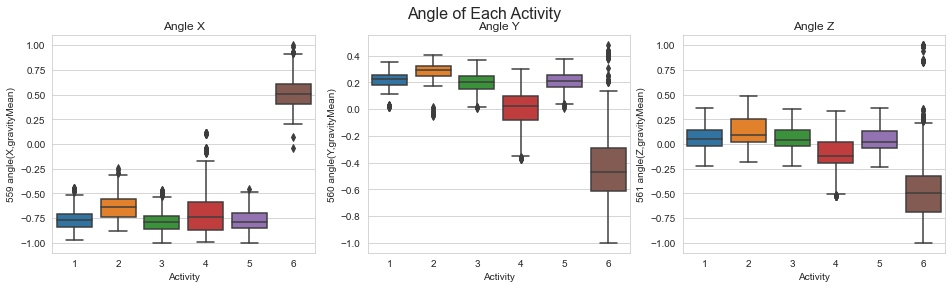

In [14]:
# lying should have different angle values from others

fig, axes = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('Angle of Each Activity', fontsize=16)
sns.boxplot(ax=axes[0], x="Activity", y="559 angle(X,gravityMean)", data=train)
axes[0].set_title('Angle X')
sns.boxplot(ax=axes[1], x="Activity", y="560 angle(Y,gravityMean)", data=train)
axes[1].set_title('Angle Y')
sns.boxplot(ax=axes[2], x="Activity", y="561 angle(Z,gravityMean)", data=train)
axes[2].set_title('Angle Z')
fig.show()

Angle X separates activity 6 (lying) from others. Angle Y separates 4 from 5 (standing and sitting). 

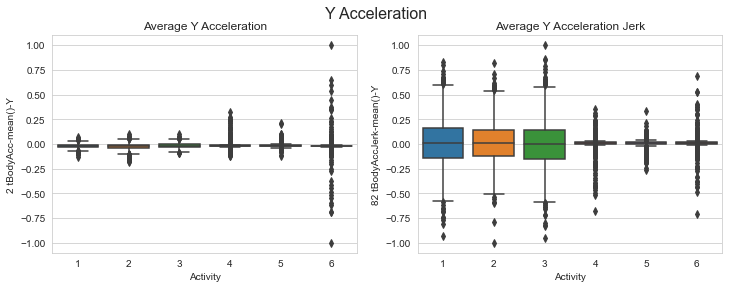

In [15]:
# walking downstairs should have different gravitational direction from walking upstairs

fig, axes = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Y Acceleration', fontsize=16)
sns.boxplot(ax=axes[0], x="Activity", y="2 tBodyAcc-mean()-Y", data=train)
axes[0].set_title('Average Y Acceleration')
sns.boxplot(ax=axes[1], x="Activity", y="82 tBodyAccJerk-mean()-Y", data=train)
axes[1].set_title('Average Y Acceleration Jerk')

fig.show()

Emm not as expected. There isn't much difference between 2 and 3. 

**Conclusion:** 
1. It should be easy to distinguish moving activites (Walking, Walking Upstairs, Walking Downstairs) and stationary activities (Standing, Sitting, Lying). 
2. It should be easy to distinguish Lying from other activities. 
3. It should not be hard to distinguish Sitting from Standing. 
3. It may be harder to distinguish between Walking, Walking upstairs, and Walking downstairs. 

# Feature Selection

This is really required as there are 561 dimension in the dataset. <br/>Will experiment with Low Variance Filter, High Correlation Filter, PCA, ICA, and t-SNE?

**Reference** <br/>
https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

In [16]:
# import numpy as np
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import seaborn as sns

In [17]:
# # performs t-sne with different perplexity values and their repective plots..

# def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
#     X_reduced = X_data
    
#     for index,perplexity in enumerate(perplexities):
#         # perform t-sne
#         print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
#         X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
#         print('Done..')
        
#         # prepare the data for seaborn         
#         print('Creating plot for this t-sne visualization..')
#         df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
#         # draw the plot in appropriate place in the grid
#         sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
#                    palette="Set1",markers=['^','v','s','o', '1','2'])
#         plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
#         img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
#         print('saving this plot as image in present working directory...')
#         plt.savefig(img_name)
#         plt.show()
#         print('Done')
    
#     return X_reduced

In [18]:
# X_pre_tsne = train.drop(['Subject', 'Activity','ActivityName'], axis=1)
# y_pre_tsne = train['ActivityName']
# reduced_data = perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [19]:
# print(reduced_data.shape)
# reduced_data

### High Variance Features

Text(0.5, 1.0, 'Feature Variance')

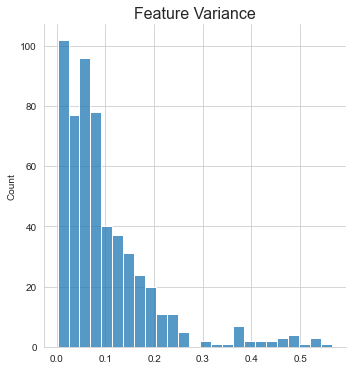

In [20]:
feature_variances = train.var()
sns.displot(feature_variances)
plt.title('Feature Variance', fontsize=16)

Many features have variances within the range of (0, 0.1), hence could try to do a Low Variance Filter to only use high variance features. 

In [21]:
feature_variance_list = list(zip(feature_variances,feature_variances.index))
high_variance_features = [x[1] for x in feature_variance_list if x[0]>0.1]
print("number of features left: {}".format(len(high_variance_features)))

number of features left: 189


### Low Correlation Features

<AxesSubplot:>

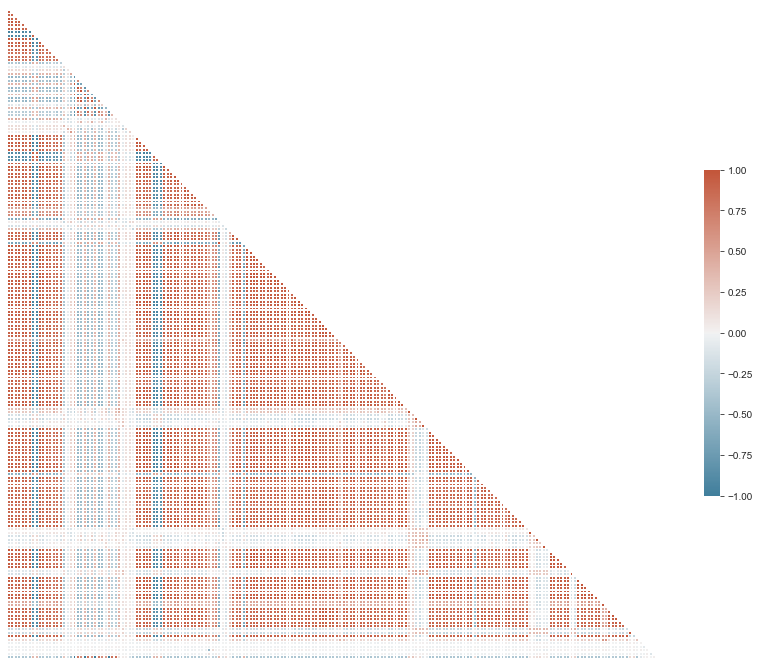

In [22]:
plt.figure(figsize=(16,12))
corr = train[high_variance_features].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            yticklabels=False, xticklabels=False)

Quite a lot of the features have correlation near -1 or 1. We could try removing any feature that has high correlation with another feature.  

In [23]:
corr_arr = corr.to_numpy()

def remove_redundant_features(corr_arr, threshold_max, threshold_min):
    feature_mask = [False for i in range(len(corr_arr))]
    delete_count = 0

    for i in range(len(corr_arr)):
        redundant = False;
        # check the whole row, if there's a correlation > threshold max or < threshold min, consider it redundant 
        for j in range(i+1, len(corr_arr)):
            if i-delete_count+1 >= len(corr_arr):
                # print("somehow wrong range value")
                break
            if corr_arr[i-delete_count][j] >= threshold_max or corr_arr[i-delete_count][j] <= threshold_min:
                redundant = True
                break
        if redundant:
            # print("deleted redundant features at index {}".format(i))
            np.delete(corr_arr, i-delete_count, 0)
            np.delete(corr_arr, i-delete_count, 1)
            # print("i-delete_count = {}".format(i-delete_count))
            # print("delete_count = {}".format(delete_count))
            delete_count += 1
        else:
            # print("feature at index {} is not redundant".format(i))
            feature_mask[i] = True

    return feature_mask
    

feature_mask = remove_redundant_features(corr_arr, 0.99, -0.99)
np_hvf = np.array(high_variance_features)
low_corr_features = np_hvf[feature_mask]
print("number of features left = {}".format(len(low_corr_features)))
print("low correlation features = {}".format(low_corr_features))

number of features left = 85
low correlation features = ['272 fBodyAcc-mad()-X' '273 fBodyAcc-mad()-Y' '274 fBodyAcc-mad()-Z'
 '275 fBodyAcc-max()-X' '276 fBodyAcc-max()-Y' '277 fBodyAcc-max()-Z'
 '281 fBodyAcc-sma()' '285 fBodyAcc-iqr()-X' '286 fBodyAcc-iqr()-Y'
 '288 fBodyAcc-entropy()-X' '289 fBodyAcc-entropy()-Y'
 '290 fBodyAcc-entropy()-Z' '297 fBodyAcc-skewness()-X'
 '298 fBodyAcc-kurtosis()-X' '299 fBodyAcc-skewness()-Y'
 '300 fBodyAcc-kurtosis()-Y' '301 fBodyAcc-skewness()-Z'
 '302 fBodyAcc-kurtosis()-Z' '345 fBodyAccJerk-mean()-X'
 '346 fBodyAccJerk-mean()-Y' '348 fBodyAccJerk-std()-X'
 '349 fBodyAccJerk-std()-Y' '351 fBodyAccJerk-mad()-X'
 '352 fBodyAccJerk-mad()-Y' '354 fBodyAccJerk-max()-X'
 '355 fBodyAccJerk-max()-Y' '360 fBodyAccJerk-sma()'
 '364 fBodyAccJerk-iqr()-X' '367 fBodyAccJerk-entropy()-X'
 '368 fBodyAccJerk-entropy()-Y' '369 fBodyAccJerk-entropy()-Z'
 '370 fBodyAccJerk-maxInds-X' '424 fBodyGyro-mean()-X'
 '425 fBodyGyro-mean()-Y' '426 fBodyGyro-mean()-Z' '428 fB

### Random Forest Classifier

In [24]:
# from sklearn.ensemble import RandomForestClassifier

In [25]:
# impt_model = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
# impt_model.fit(X_train_dropped, y_train)
# impt_mask = [x>0.005 for x in impt_model.feature_importances_]
# impt_features = []
# print(len(X_train_dropped.columns))
# print(len(impt_mask))

# for i in range(len(X_train_dropped.columns)):
#     if impt_mask[i] == 1:
#         impt_features.append(X_train_dropped.columns[i])

# print("number of features with importance > 0.01: {}".format(len(impt_features)))
# print("important features: {}".format(impt_features))

# Model Building

### For plotting confusion matrix

In [26]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



### Generic function to run any model specified

In [27]:
from datetime import datetime

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
    
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print GridSearch attributes

In [28]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal number of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

### Preparation

In [29]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Classification with SVM

As SVC is effective in high dimensional spaces, it looks suitable to this classification task (561 dimensions). 

Also, SVM algorithms are not scale invariant, and require scaled data -- which we already have! (https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use)

## Linear SVC

In [30]:
from sklearn.svm import LinearSVC

#### Attempt #1

training the model..
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:   30.0s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:32.385750


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.028824


---------------------
|      Accuracy      |
---------------------

    0.9667458432304038


--------------------
| Confusion Matrix |
--------------------

 [[496   0   0   0   0   0]
 [ 18 453   0   0   0   0]
 [  3   5 412   0   0   0]
 [  0   3   0 429  57   2]
 [  1   0   0   9 522   0]
 [  0   0   0   0   0 537]]


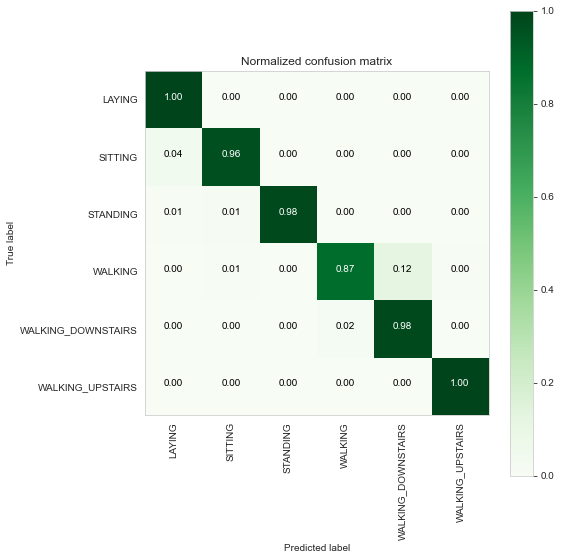

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.98      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947

{'training_time': datetime.timedelta(seconds=32, microseconds=385750), 'testing_time': datetime.timedelta(microseconds=28824), 'predicted': array([5, 5, 5, ..., 2, 2, 2], dtype=int64), 'accuracy': 0.9667458432304038, 'confusion_matrix': array([[496,   0,   0,   0,   0,   0],
       [ 18, 453,   0,   0,   0,   0],
       [  3,   5, 412,   0,   0,   0],
       [  0,   3,   0, 429

In [31]:
parameters = {'C':[0.125, 0.5, 1, 2, 8]}
lr_svc = LinearSVC(dual=False)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

print(lr_svc_grid_results)

print_grid_search_attributes(lr_svc_grid_results['model'])

### Attempt #2

training the model..
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:   22.3s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:24.739316


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008076


---------------------
|      Accuracy      |
---------------------

    0.9664065151001018


--------------------
| Confusion Matrix |
--------------------

 [[496   0   0   0   0   0]
 [ 17 454   0   0   0   0]
 [  2   6 412   0   0   0]
 [  0   3   0 428  58   2]
 [  1   0   0  10 521   0]
 [  0   0   0   0   0 537]]


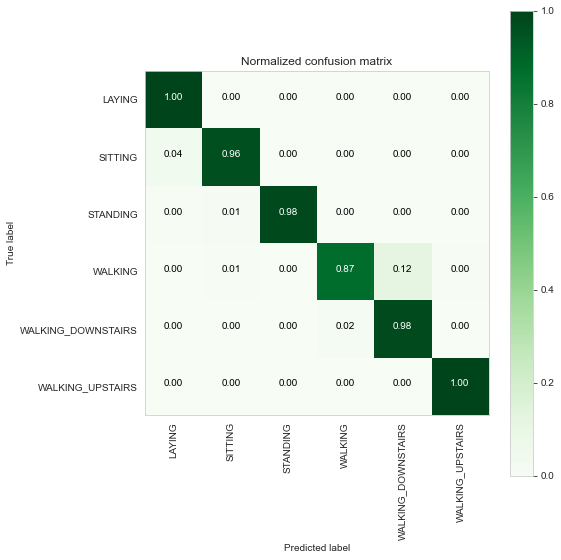

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.98      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947

{'training_time': datetime.timedelta(seconds=24, microseconds=739316), 'testing_time': datetime.timedelta(microseconds=8076), 'predicted': array([5, 5, 5, ..., 2, 2, 2], dtype=int64), 'accuracy': 0.9664065151001018, 'confusion_matrix': array([[496,   0,   0,   0,   0,   0],
       [ 17, 454,   0,   0,   0,   0],
       [  2,   6, 412,   0,   0,   0],
       [  0,   3,   0, 428,

In [32]:
parameters = {'C':[0.3, 0.4, 0.5, 0.6, 0.7]}
lr_svc = LinearSVC(dual=False)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

print(lr_svc_grid_results)

print_grid_search_attributes(lr_svc_grid_results['model'])

### Attempt #3

training the model..
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:   42.9s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:46.246225


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.015624


---------------------
|      Accuracy      |
---------------------

    0.9667458432304038


--------------------
| Confusion Matrix |
--------------------

 [[496   0   0   0   0   0]
 [ 17 454   0   0   0   0]
 [  2   5 413   0   0   0]
 [  0   3   0 428  58   2]
 [  1   0   0  10 521   0]
 [  0   0   0   0   0 537]]


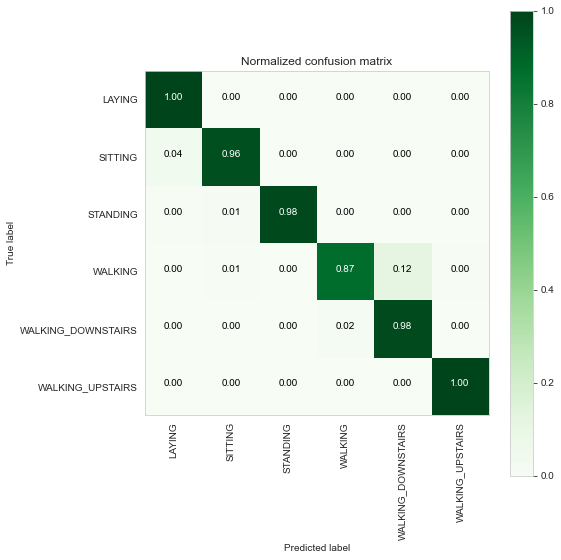

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.98      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947

{'training_time': datetime.timedelta(seconds=46, microseconds=246225), 'testing_time': datetime.timedelta(microseconds=15624), 'predicted': array([5, 5, 5, ..., 2, 2, 2], dtype=int64), 'accuracy': 0.9667458432304038, 'confusion_matrix': array([[496,   0,   0,   0,   0,   0],
       [ 17, 454,   0,   0,   0,   0],
       [  2,   5, 413,   0,   0,   0],
       [  0,   3,   0, 428

In [33]:
parameters = {'loss':['hinge', 'squared_hinge'], 'tol':[0.001, 0.0001, 0.00001], 'C':[0.5, 0.6, 0.7]}
lr_svc = LinearSVC(dual=False)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

print(lr_svc_grid_results)

print_grid_search_attributes(lr_svc_grid_results['model'])

### Initial Model

In [34]:
lr_svc = LinearSVC(dual=False, tol=0.0001, C=0.5)
lr_svc.fit(X_train_dropped, y_train)
y_pred = lr_svc.predict(X_test_dropped)
print("Linear SVC Accuracy: {}".format(metrics.accuracy_score(y_pred, y_test)))
scores = cross_val_score(lr_svc, X_train_dropped, y_train, cv=5)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()*2))

Linear SVC Accuracy: 0.9667458432304038
Accuracy: 0.94206 (+/- 0.05355)


### Final Model

In [35]:
lr_svc = LinearSVC(dual=False, tol=0.00001, C=0.6)
lr_svc.fit(X_train_dropped, y_train)
y_pred = lr_svc.predict(X_test_dropped)
print("Linear SVC Accuracy: {}".format(metrics.accuracy_score(y_pred, y_test)))
scores = cross_val_score(lr_svc, X_train_dropped, y_train, cv=5)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()*2))

Linear SVC Accuracy: 0.9667458432304038
Accuracy: 0.94234 (+/- 0.05346)


Tuned the model and achieved a slight increase in cross validation accuracy... 


## SVC with Linear/Poly/RBF/Sigmoid Kernel?

In [36]:
from sklearn.svm import SVC

### Attempt #1

training the model..
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  2.5min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:02:34.909647


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.553680


---------------------
|      Accuracy      |
---------------------

    0.9599592806243638


--------------------
| Confusion Matrix |
--------------------

 [[490   4   2   0   0   0]
 [ 20 450   1   0   0   0]
 [  4  19 397   0   0   0]
 [  0   2   0 435  54   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]


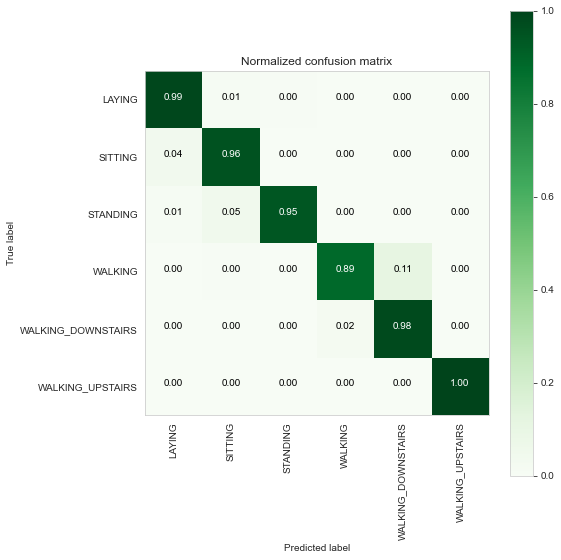

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.95      0.96      0.95       471
           3       0.99      0.95      0.97       420
           4       0.97      0.89      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=2, kernel='poly')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 2, 'kernel': 'poly'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross 

In [56]:
parameters = {'C':[0.5, 1, 2], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc = SVC()
svc_grid = GridSearchCV(svc, param_grid=parameters, n_jobs=8, verbose=1)
svc_grid_results = perform_model(svc_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

print_grid_search_attributes(svc_grid_results['model'])

### Attempt #2

training the model..
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:   25.7s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:28.761786


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.136249


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[488   4   4   0   0   0]
 [ 19 451   1   0   0   0]
 [  3  14 403   0   0   0]
 [  0   2   0 440  49   0]
 [  0   0   0  13 519   0]
 [  0   0   0   0   0 537]]


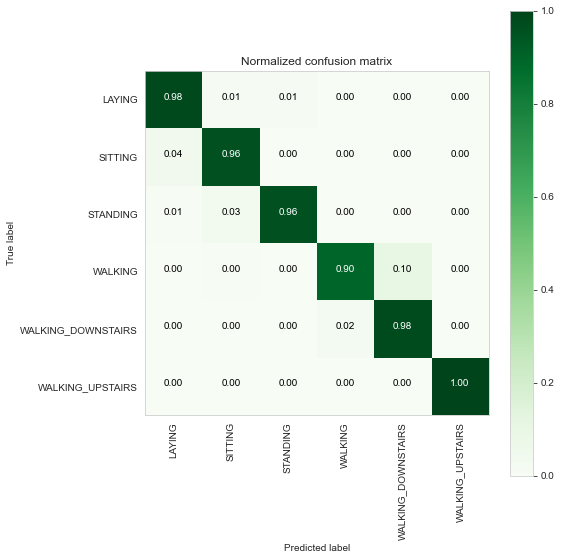

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       496
           2       0.96      0.96      0.96       471
           3       0.99      0.96      0.97       420
           4       0.97      0.90      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=10, kernel='poly')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 10}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets:

In [39]:
parameters = {'C':[2, 4, 6, 8, 10, 12]}
svc = SVC(kernel='poly')
svc_grid = GridSearchCV(svc, param_grid=parameters, n_jobs=8, verbose=1)
svc_grid_results = perform_model(svc_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

print_grid_search_attributes(svc_grid_results['model'])

### Attempt 3

training the model..
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   15.3s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:18.611204


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.290759


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[488   4   4   0   0   0]
 [ 19 451   1   0   0   0]
 [  3  14 403   0   0   0]
 [  0   2   0 440  49   0]
 [  0   0   0  13 519   0]
 [  0   0   0   0   0 537]]


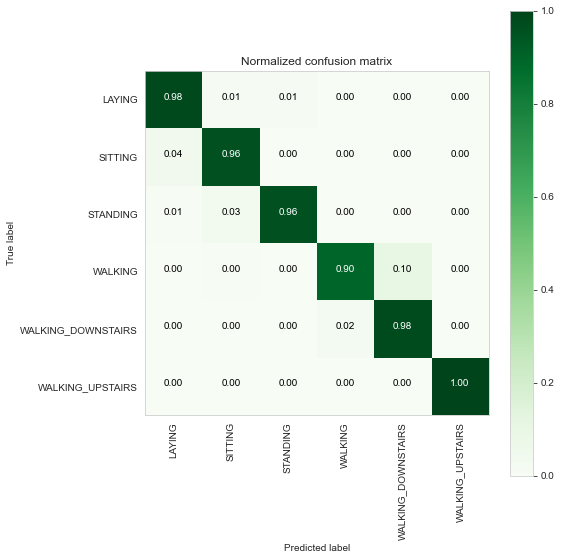

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       496
           2       0.96      0.96      0.96       471
           3       0.99      0.96      0.97       420
           4       0.97      0.90      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=10, kernel='poly')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'tol': 0.001}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation 

In [40]:
parameters = {'tol':[0.001, 0.0001, 0.00001]}
svc = SVC(kernel='poly', C=10)
svc_grid = GridSearchCV(svc, param_grid=parameters, n_jobs=8, verbose=1)
svc_grid_results = perform_model(svc_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

print_grid_search_attributes(svc_grid_results['model'])

### Attempt 4

training the model..
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   14.6s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:17.934804


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.221733


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[488   4   4   0   0   0]
 [ 19 451   1   0   0   0]
 [  3  14 403   0   0   0]
 [  0   2   0 440  49   0]
 [  0   0   0  13 519   0]
 [  0   0   0   0   0 537]]


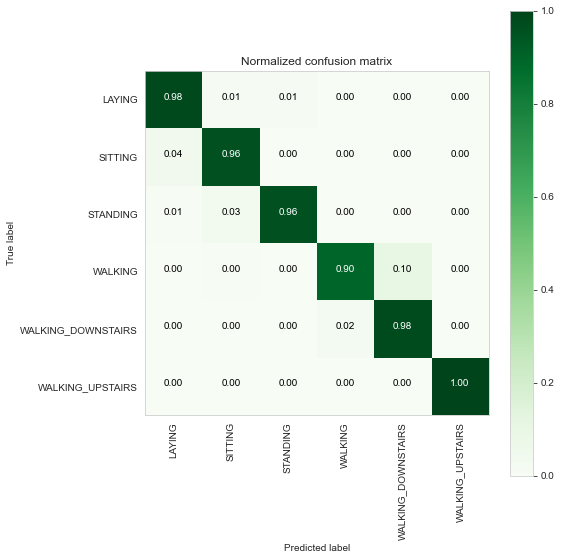

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       496
           2       0.96      0.96      0.96       471
           3       0.99      0.96      0.97       420
           4       0.97      0.90      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=10, kernel='poly')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'tol': 0.001}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation 

In [41]:
parameters = {'tol':[0.005, 0.001, 0.0005]}
svc = SVC(kernel='poly', C=10)
svc_grid = GridSearchCV(svc, param_grid=parameters, n_jobs=8, verbose=1)
svc_grid_results = perform_model(svc_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

print_grid_search_attributes(svc_grid_results['model'])

### Attempt #5

training the model..
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:   18.6s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:21.921476


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.307185


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[488   4   4   0   0   0]
 [ 19 451   1   0   0   0]
 [  3  14 403   0   0   0]
 [  0   2   0 440  49   0]
 [  0   0   0  13 519   0]
 [  0   0   0   0   0 537]]


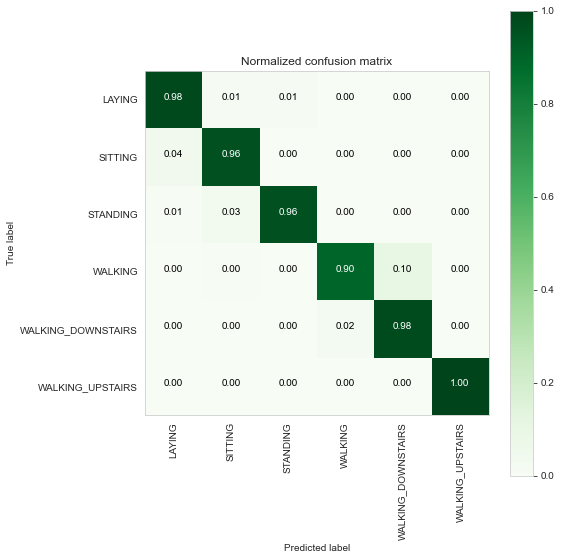

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       496
           2       0.96      0.96      0.96       471
           3       0.99      0.96      0.97       420
           4       0.97      0.90      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=10, kernel='poly')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'degree': 3}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation s

In [47]:
parameters = {'degree':[2,3,4,5]}
svc = SVC(kernel='poly', C=10, tol=0.001)
svc_grid = GridSearchCV(svc, param_grid=parameters, n_jobs=8, verbose=1)
svc_grid_results = perform_model(svc_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

print_grid_search_attributes(svc_grid_results['model'])

### Initial Model

In [49]:
svc = SVC(kernel='poly')
svc.fit(X_train_dropped, y_train)
y_pred = svc.predict(X_test_dropped)
print("Poly SVC Accuracy: {}".format(metrics.accuracy_score(y_pred, y_test)))
scores = cross_val_score(svc, X_train_dropped, y_train, cv=5)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()*2))


Poly SVC Accuracy: 0.9579233118425518
Accuracy: 0.94070 (+/- 0.03928)


### Final Model

In [48]:
svc = SVC(kernel='poly', C=10, tol=0.001, degree=3)
svc.fit(X_train_dropped, y_train)
y_pred = svc.predict(X_test_dropped)
print("Poly SVC Accuracy: {}".format(metrics.accuracy_score(y_pred, y_test)))
scores = cross_val_score(svc, X_train_dropped, y_train, cv=5)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()*2))


Poly SVC Accuracy: 0.9630132337970818
Accuracy: 0.94492 (+/- 0.04532)


Achieved slight increase in accuracy after tweaking the parameters. 

## Classification with Logistic Regression

### Attempt #1

training the model..
Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done  75 out of  75 | elapsed:  3.8min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:03:53.128156


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.015646


---------------------
|      Accuracy      |
---------------------

    0.9619952494061758


--------------------
| Confusion Matrix |
--------------------

 [[494   0   2   0   0   0]
 [ 24 447   0   0   0   0]
 [  4   8 408   0   0   0]
 [  0   3   0 429  59   0]
 [  2   0   0  10 520   0]
 [  0   0   0   0   0 537]]


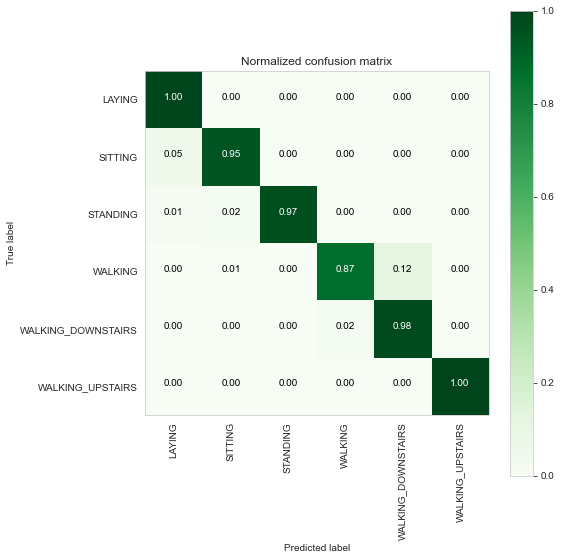

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       496
           2       0.98      0.95      0.96       471
           3       1.00      0.97      0.98       420
           4       0.98      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=4, solver='liblinear')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 4, 'solver': 'liblinear'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

In [44]:
parameters = {'C':[0.125, 0.5, 1, 2, 4], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

print_grid_search_attributes(log_reg_grid_results['model'])

training the model..
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 out of  12 | elapsed:   25.1s remaining:    4.9s
[Parallel(n_jobs=8)]: Done  12 out of  12 | elapsed:   25.2s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:34.059940


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[495   0   1   0   0   0]
 [ 22 449   0   0   0   0]
 [  4   8 408   0   0   0]
 [  0   3   0 429  58   1]
 [  1   0   0  11 520   0]
 [  0   0   0   0   0 537]]


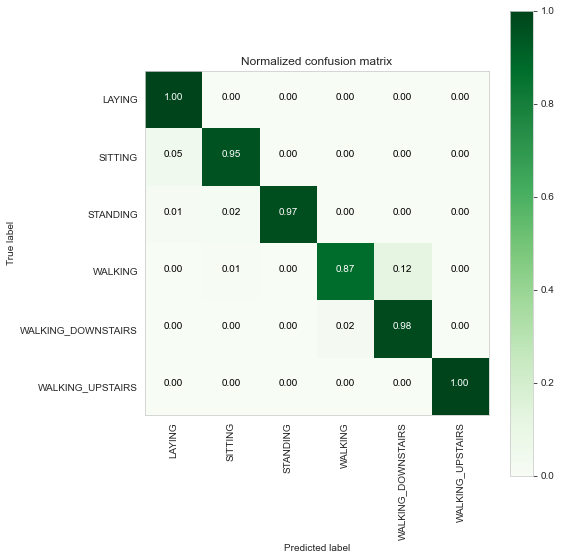

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.98      0.95      0.96       471
           3       1.00      0.97      0.98       420
           4       0.97      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=16, solver='liblinear')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cr

In [45]:
parameters = {'C':[2, 4, 8, 16], }
log_reg = linear_model.LogisticRegression(solver='liblinear')
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

print_grid_search_attributes(log_reg_grid_results['model'])

training the model..
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   4 out of   9 | elapsed:   15.4s remaining:   19.3s
[Parallel(n_jobs=8)]: Done   9 out of   9 | elapsed:   20.8s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:29.472941


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[495   0   1   0   0   0]
 [ 22 449   0   0   0   0]
 [  4   8 408   0   0   0]
 [  0   4   0 428  57   2]
 [  1   0   0  11 520   0]
 [  0   0   0   0   0 537]]


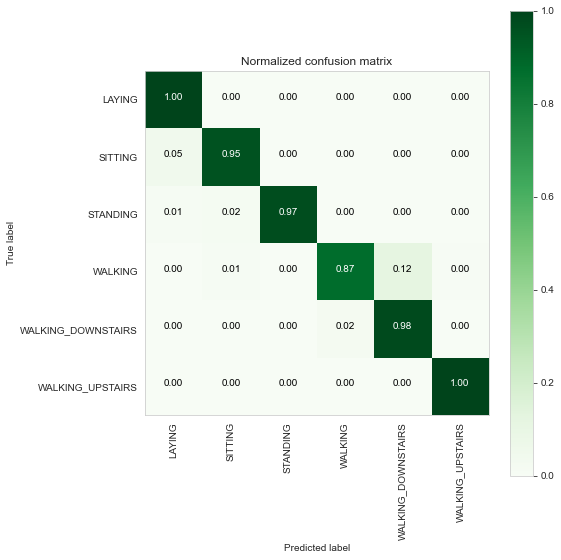

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.97      0.95      0.96       471
           3       1.00      0.97      0.98       420
           4       0.97      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=32, solver='liblinear')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 32}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cr

In [46]:
parameters = {'C':[16, 32, 64], }
log_reg = linear_model.LogisticRegression(solver='liblinear')
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

print_grid_search_attributes(log_reg_grid_results['model'])

### Initial Model

In [51]:
log_reg = linear_model.LogisticRegression(solver='liblinear')
log_reg.fit(X_train_dropped, y_train)
y_pred = log_reg.predict(X_test_dropped)
print("Logistic Regression Accuracy: {}".format(metrics.accuracy_score(y_pred, y_test)))
scores = cross_val_score(log_reg, X_train_dropped, y_train, cv=5)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()*2))

Logistic Regression Accuracy: 0.9619952494061758
Accuracy: 0.93826 (+/- 0.05087)


### Final Model

In [52]:
log_reg = linear_model.LogisticRegression(solver='liblinear', C=32)
log_reg.fit(X_train_dropped, y_train)
y_pred = log_reg.predict(X_test_dropped)
print("Logistic Regression Accuracy: {}".format(metrics.accuracy_score(y_pred, y_test)))
scores = cross_val_score(log_reg, X_train_dropped, y_train, cv=5)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()*2))

Logistic Regression Accuracy: 0.9630132337970818
Accuracy: 0.94030 (+/- 0.05610)



### References

https://github.com/UdiBhaskar/Human-Activity-Recognition--Using-Deep-NN/blob/master/Human%20Activity%20Detection.ipynb